In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import Regularizer
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = open('/content/romanized_urdu_poetry_3.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
tokenizer.word_index

{'hai': 1,
 'ek': 2,
 'mein': 3,
 'bhi': 4,
 'jo': 5,
 'ki': 6,
 'ke': 7,
 'woh': 8,
 'ka': 9,
 'har': 10,
 'zindagi': 11,
 'lage': 12,
 'teri': 13,
 'dil': 14,
 'rahi': 15,
 'mohabbat': 16,
 'mujhe': 17,
 'par': 18,
 'gaya': 19,
 'yaadon': 20,
 'raha': 21,
 'rawani': 22,
 'ne': 23,
 'ab': 24,
 'saaye': 25,
 'bas': 26,
 'naye': 27,
 'dukh': 28,
 'mod': 29,
 'pe': 30,
 'tha': 31,
 'sapne': 32,
 'baatein': 33,
 'humne': 34,
 'kabhi': 35,
 'naya': 36,
 'sirf': 37,
 'thi': 38,
 'hain': 39,
 'tera': 40,
 'aaye': 41,
 'chandni': 42,
 'raaton': 43,
 'kahani': 44,
 'dariya': 45,
 'kone': 46,
 'shajar': 47,
 'mausam': 48,
 'se': 49,
 'samajhne': 50,
 'wale': 51,
 'riwayat': 52,
 'diya': 53,
 'sabak': 54,
 'phir': 55,
 'kisi': 56,
 'sawal': 57,
 'raat': 58,
 'bujhane': 59,
 'raaz': 60,
 'anjaana': 61,
 'mazhab': 62,
 'samajh': 63,
 'maqsad': 64,
 'koi': 65,
 'toh': 66,
 'hota': 67,
 'sambhalta': 68,
 'magar': 69,
 'saath': 70,
 'chhodne': 71,
 'aur': 72,
 'tanhaayi': 73,
 'ibadat': 74,
 'soch': 

In [4]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [5]:
corpus[0]

'ab bhi teri yaad adhuri si hai.'

In [6]:
input_sequences

[[24, 4],
 [24, 4, 13],
 [24, 4, 13, 107],
 [24, 4, 13, 107, 108],
 [24, 4, 13, 107, 108, 109],
 [24, 4, 13, 107, 108, 109, 1],
 [8, 33],
 [8, 33, 5],
 [8, 33, 5, 34],
 [8, 33, 5, 34, 6],
 [8, 33, 5, 34, 6, 38],
 [8, 33, 5, 34, 6, 38, 35],
 [14, 7],
 [14, 7, 46],
 [14, 7, 46, 3],
 [14, 7, 46, 3, 2],
 [14, 7, 46, 3, 2, 126],
 [14, 7, 46, 3, 2, 126, 1],
 [18, 97],
 [18, 97, 98],
 [18, 97, 98, 29],
 [18, 97, 98, 29, 30],
 [18, 97, 98, 29, 30, 41],
 [18, 97, 98, 29, 30, 41, 39],
 [18, 24],
 [18, 24, 4],
 [18, 24, 4, 8],
 [18, 24, 4, 8, 20],
 [18, 24, 4, 8, 20, 3],
 [18, 24, 4, 8, 20, 3, 1],
 [16, 9],
 [16, 9, 48],
 [16, 9, 48, 119],
 [16, 9, 48, 119, 4],
 [16, 9, 48, 119, 4, 19],
 [5, 14],
 [5, 14, 7],
 [5, 14, 7, 2],
 [5, 14, 7, 2, 46],
 [5, 14, 7, 2, 46, 3],
 [5, 14, 7, 2, 46, 3, 120],
 [5, 14, 7, 2, 46, 3, 120, 1],
 [8, 33],
 [8, 33, 5],
 [8, 33, 5, 34],
 [8, 33, 5, 34, 6],
 [8, 33, 5, 34, 6, 38],
 [8, 33, 5, 34, 6, 38, 35],
 [42, 43],
 [42, 43, 3],
 [42, 43, 3, 40],
 [42, 43, 3, 40, 96

In [7]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))



In [8]:
input_sequences.shape

(17070, 8)

In [9]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [10]:
print(total_words)
print(max_sequence_len)

158
8


In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=8))  # Input length matches predictors.shape[1]
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(158, activation='softmax'))  # Output units match label.shape[1]
optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
print(predictors.shape)
print(label.shape)

(17070, 7)
(17070, 158)


In [13]:
 history = model.fit(predictors, label, epochs=3, verbose=1)

Epoch 1/3
534/534 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.1649 - loss: 3.8716
Epoch 2/3
534/534 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5984 - loss: 1.5758
Epoch 3/3
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8500 - loss: 0.6522


In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming `tokenizer` is already trained
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully!")


Tokenizer saved successfully!


In [15]:
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

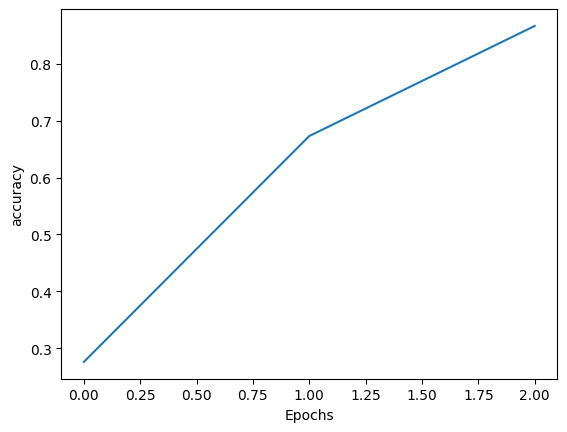

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_graph(history,'accuracy')

In [17]:
import random

seed_text = "kha ho tum"
total_lines = 4  # Number of lines in the poem
words_per_line = 6  # Words per line
poem = ""

for line in range(total_lines):
    current_line = seed_text  # Start with the seed text
    generated_line = ""

    for _ in range(words_per_line):
        # Convert current line to token sequence
        token_list = tokenizer.texts_to_sequences([current_line])[0]

        # Pad the sequence
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

        # Predict the next word
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted_probs, axis=-1)  # Get the index of the predicted word

        # Map the predicted index to the word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        # Append the predicted word to the current line
        generated_line += output_word + " "
        current_line += " " + output_word  # Update input for the next prediction

    # Append the generated line to the poem
    poem += generated_line.strip() + "\n"

    # **Modify the seed text for the next line**
    # Select **2 to 4 words randomly** from the previous line to form the new seed
    words_from_previous = generated_line.split()
    seed_length = random.randint(2, 4)  # Pick between 2 and 4 words randomly
    seed_text = " ".join(words_from_previous[-seed_length:])  # Avoid repeating full line

print(poem)


ki chup rehkar bhi samjhaya raha
ka geet suna si hai hain
woh yaadon mein hai hain hain
woh juda ho gaya humne mein



In [20]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Load Tokenizer & Prepare Data
tokenizer = Tokenizer()
data = open('/content/romanized_urdu_poetry_3.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Determine max_sequence_len from training data
max_sequence_len = max(len(tokenizer.texts_to_sequences([line])[0]) for line in corpus)

# Rebuild the model architecture
model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len - 1),
    Bidirectional(LSTM(150, return_sequences=True)),
    Dropout(0.2),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

# **Build the model before loading weights**
model.build(input_shape=(None, max_sequence_len - 1))  # Input shape should match training data

# Load saved weights
model.load_weights("/content/model.weights.h5")
print("Model loaded successfully!")

# Function to generate poetry
def generate_poetry(seed_text, words_per_line=6, total_lines=4):
    poem = ""
    for _ in range(total_lines):
        current_line = seed_text
        generated_line = ""

        for _ in range(words_per_line):
            token_list = tokenizer.texts_to_sequences([current_line])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

            predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

            output_word = next((word for word, index in tokenizer.word_index.items() if index == predicted), "")
            generated_line += output_word + " "
            current_line += " " + output_word

        poem += generated_line.strip() + "\n"
        seed_text = " ".join(generated_line.split()[-3:])  # Use last 3 words as the new seed

    return poem

# Generate poetry from a seed text
seed_text = "kha ho tum"
print("Generated Poetry:\n", generate_poetry(seed_text))


Model loaded successfully!
Generated Poetry:
 ki chup rehkar bhi samjhaya raha
ka geet suna si hai hain
woh yaadon mein hai hain hain
woh juda ho gaya humne mein

